# Support Vector Machine


## What is Support Vector Machine?
   Support Vector Machine, abbreviated as SVM, is a supervised machine learning algorithm that separates data samples 
represented as points in space using a line or hyperplane. This separation is such that the data points that are on the same side of the line are similar to each other and are placed in the same group. New data samples will be placed in one of 
the existing categories after being added to the same space.

### Here, using the functions available in the sklearn library, we will design a support vector machine with two classes.

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from yellowbrick.contrib.classifier import DecisionViz
import warnings
warnings.filterwarnings('ignore')

### load data

In [2]:
df = pd.read_csv('sin.csv')

In [3]:
df.head()

,0,1,2
0,0.873008,0.672227,0.0
1,0.534722,0.671441,1.0
2,0.725173,0.577389,0.0
3,0.851713,0.612270,0.0
4,0.205497,0.498256,1.0


In [4]:
X = df.drop(['2'], axis=1)
y = df['2']

We consider 80% of the data as training data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

standardize the data values into a standard format

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
y_train = np.array(y_train)
y_test = np.array(y_test)

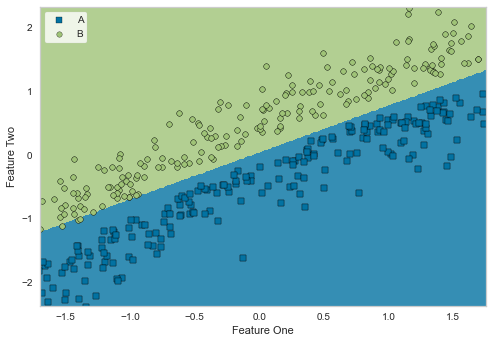

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [8]:
viz0 = DecisionViz(
    SVC(kernel="linear", C=0.025), title="Linear SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
viz0.fit(X_train, y_train)
viz0.draw(X_train, y_train)
viz0.show()

# C parameter

The tuning parameter (often referred to as the c parameter in the sklearn "Python" library) of SVM optimization indicates how much you want to avoid unclassified data in each training sample.

For large values of c, the optimizer chooses a hyperplane with a smaller margin if this hyperplane does a better job of getting all training points correctly classified. In contrast, a very small value of c causes the optimizer to seek a larger separating hyperplane, even though this hyperplane shows more unclassified points.

### c = 0.002

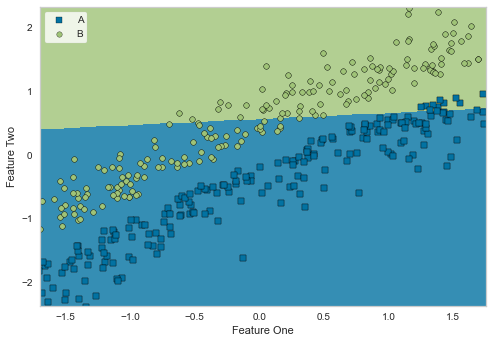

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [9]:
viz = DecisionViz(
    SVC(kernel="linear", C=0.002), title="Linear SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
viz.fit(X_train, y_train)
viz.draw(X_train, y_train)
viz.show()

For small values of c, the optimizer looks for a hyperplane that maximizes the margin even if that plane misclassifies more points, which is why we got misclassifications when we set c to 0.002.

### c=2

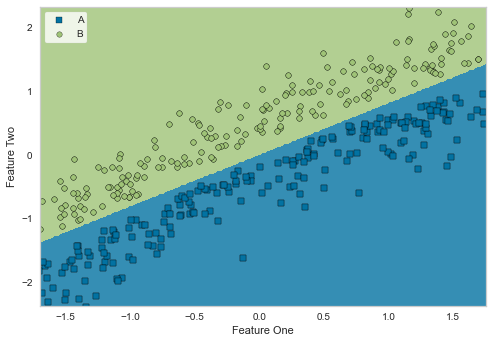

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [10]:
viz1 = DecisionViz(
    SVC(kernel="linear", C=2), title="Linear SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
viz1.fit(X_train, y_train)
viz1.draw(X_train, y_train)
viz1.show()

 For large values of c, the optimizer chooses a hyperplane with a smaller margin if that hyperplane provides better performance in correctly classifying all training points, as we can see when we increase c The classification was done correctly

# Support vector machine and nonlinear data

In the previous example, we saw that our data was linearly separable so far, that is, we could draw a straight line to separate the two classes, but what if our data points look like this? These two classes are not separated by a straight line.
In the support vector machine algorithm, it is easy to construct a hyperplane for linearly separable data points, but it is very challenging when the data is nonlinearly separable.

#### The data in the sin_p.csv file are not linearly separable. We design a support vector machine to classify the data in this file using Gaussian kernels.

### load data

In [11]:
df1 = pd.read_csv('sin_p.csv')

In [12]:
df1.head()

,0,1,2
0,0.986949,0.939815,1.0
1,1.763301,1.129499,1.0
2,2.818990,0.021507,0.0
3,0.688434,1.046776,1.0
4,3.711935,-0.770877,0.0


In [13]:
X1 = df1.drop(['2'], axis=1)
y1 = df1['2']

We consider 90% of the data as training data

In [14]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.1, random_state = 0)

standardize the data values into a standard format

In [15]:
scaler1 = StandardScaler()
X_train1 = scaler1.fit_transform(X_train1)
X_test1 = scaler1.transform(X_test1)

In [16]:
y_train1 = np.array(y_train1)
y_test1 = np.array(y_test1)

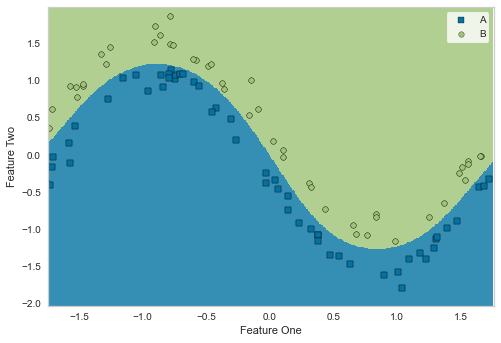

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [17]:
vizp = DecisionViz(
    SVC(kernel="rbf", C=1), title="gussian SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
vizp.fit(X_train1, y_train1)
vizp.draw(X_test1, y_test1)
vizp.show()

# gamma parameter

The gamma parameter determines how effective each training example is, where low values mean more impact and high values mean less impact. In other words, with low gamma, points far from the possible separation line are considered to calculate the separation line. And with higher gamma, points closer to the probability line are considered in the calculation.

### gamma=0.01

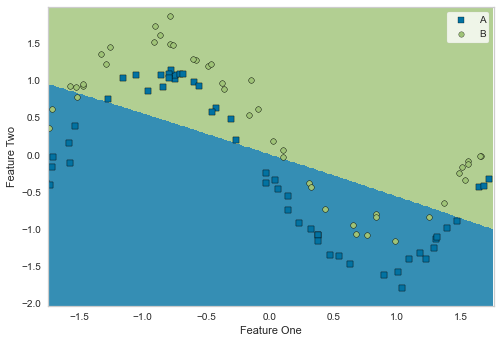

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [18]:
vizp1 = DecisionViz(
    SVC(kernel="rbf", C=1, gamma=0.01), title="gussian SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
vizp1.fit(X_train1, y_train1)
vizp1.draw(X_test1, y_test1)
vizp1.show()

Here, we set the gamma to be small. When the gamma is too small, the model is very limited and cannot record the complexity or shape of the data, and the area of influence of each selected support vector includes the entire training set, and the resulting model looks like a linear model with a set of Hyperpages will behave.

### gamma=10

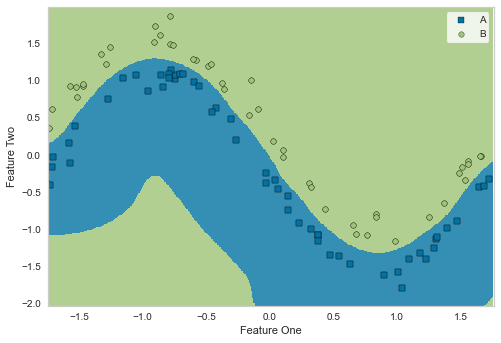

<AxesSubplot:xlabel='Feature One', ylabel='Feature Two'>

In [19]:
vizp2 = DecisionViz(
    SVC(kernel="rbf", C=1, gamma=10), title="gussian SVM",
    features=['Feature One', 'Feature Two'], classes=['A', 'B']
)
vizp2.fit(X_train1, y_train1)
vizp2.draw(X_test1, y_test1)
vizp2.show()

If gamma is too large, the radius of the influence area of the support vectors only includes the support vector itself, and in this case, no amount of C regularization can prevent overfitting.